In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [10]:
train = pd.read_csv('data/train.csv.gzip', compression='gzip')
train.index = train.id
train.drop(['id'], axis=1, inplace=True)
print(train.shape)
train.head()

(39774, 2)


,cuisine,ingredients
id,,
10259,greek,romaine lettuce;black olives;grape tomatoes;ga...
25693,southern_us,plain flour;ground pepper;salt;tomatoes;ground...
20130,filipino,eggs;pepper;salt;mayonaise;cooking oil;green c...
22213,indian,water;vegetable oil;wheat;salt
13162,indian,black pepper;shallots;cornflour;cayenne pepper...


In [103]:
vec = CountVectorizer()
X = vec.fit_transform(train.ingredients)
X.shape

(39774, 3010)

In [31]:
pca = PCA(n_components=2)
x = pca.fit_transform(X.toarray())

In [28]:
def draw(x, labels):
    plt.subplots(figsize=(10,10))
    colors = cm.rainbow(np.linspace(0, 1, len(set(labels))))
    for y_, c in zip(set(labels), colors):
        plt.scatter(x[labels==y_, 0], 
                    x[labels==y_, 1], c=c, alpha=0.5, label=str(y_))

In [15]:
train.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish',
       'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese',
       'cajun_creole', 'brazilian', 'french', 'japanese', 'irish',
       'korean', 'moroccan', 'russian'], dtype=object)

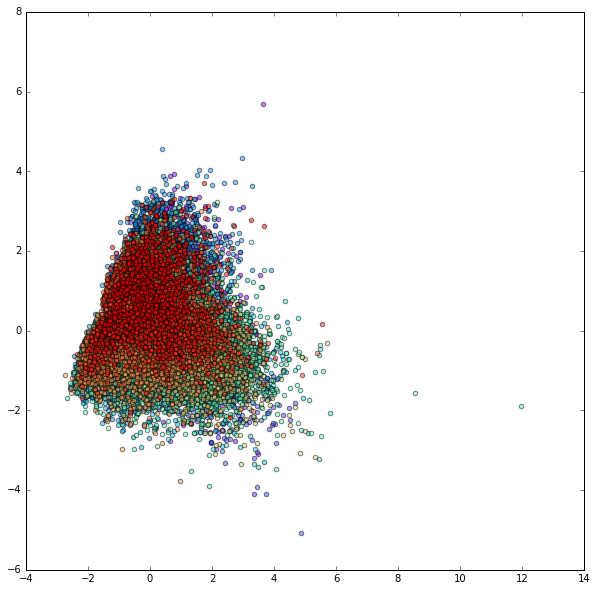

In [37]:
draw(x, train.target)

In [16]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=10000, stop_words=['water', 'salt'])
X = tfidf.fit_transform(train.ingredients)
X.shape

(39774, 10000)

In [18]:
sorted(zip(tfidf.get_feature_names(),np.asarray(X.sum(axis=0)).ravel()), key=lambda el: el[1], reverse=True)

[('pepper', 1285.7001953977913),
 ('oil', 1152.519921779101),
 ('fresh', 1075.4282366106706),
 ('ground', 1075.0673214141925),
 ('garlic', 981.41856783585388),
 ('sugar', 948.85148814607567),
 ('sauce', 893.76763401416702),
 ('cheese', 879.3586795744643),
 ('onions', 811.87757733325236),
 ('chicken', 794.86882933203515),
 ('olive', 764.00866137508513),
 ('olive oil', 763.74881842257173),
 ('flour', 738.59146001558929),
 ('butter', 733.95942556133593),
 ('black', 728.37073180864127),
 ('red', 657.23257263582479),
 ('powder', 655.97037733662171),
 ('tomatoes', 645.12055861622139),
 ('green', 638.86212592422589),
 ('juice', 608.84970634512581),
 ('chopped', 607.09431987946277),
 ('black pepper', 602.81561592696767),
 ('eggs', 597.80008201458622),
 ('white', 596.3214047837447),
 ('milk', 577.56469400337653),
 ('cloves', 570.41412409096336),
 ('cream', 564.33873123666649),
 ('lemon', 561.2482943455326),
 ('garlic cloves', 547.8033923480923),
 ('onion', 539.51989694721328),
 ('rice', 535.407

In [100]:
pca = PCA(n_components=2)
x = pca.fit_transform(X.toarray())

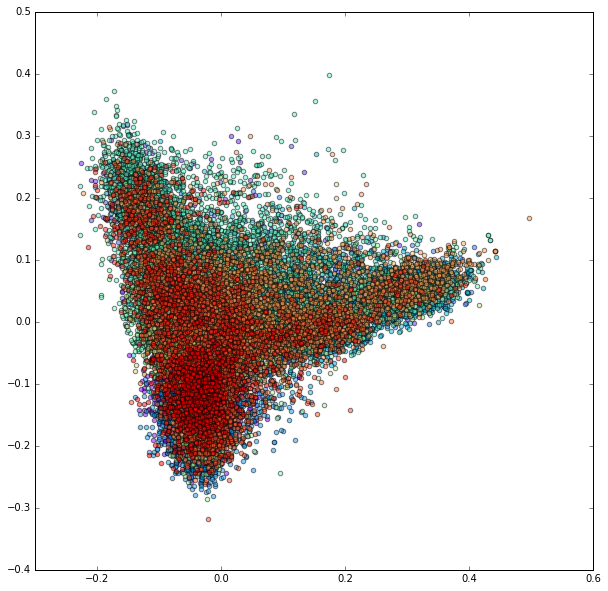

In [101]:
draw(x, train.target)

In [46]:
from sklearn.cluster import KMeans

def kmeans_cultures(data, numOfClusters):
    kmeans = KMeans(init='k-means++', n_clusters=numOfClusters, n_init=10)
    kmeans.fit(data)
    return kmeans.predict(data)

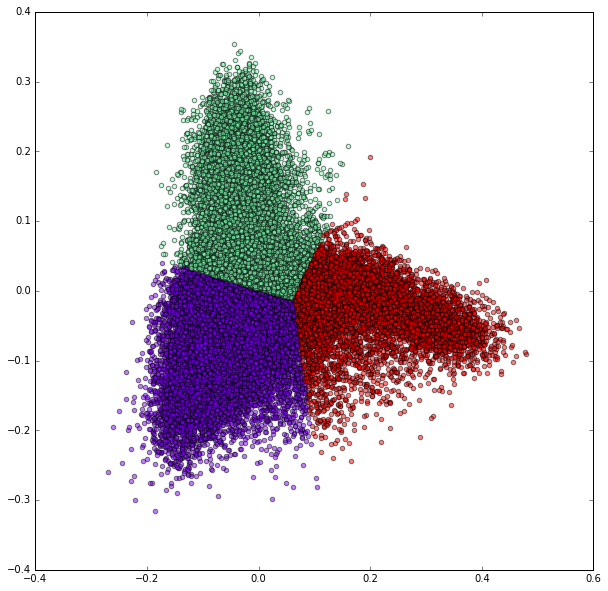

In [91]:
labels = kmeans_cultures(x, 3)
draw(x, labels)

In [92]:
train['groups'] = labels
train.head()

,target,ingredients,groups
id,,,
10259,greek,romaine lettuce;black olives;grape tomatoes;ga...,0
25693,southern_us,plain flour;ground pepper;salt;tomatoes;ground...,0
20130,filipino,eggs;pepper;salt;mayonaise;cooking oil;green c...,1
22213,indian,water;vegetable oil;wheat;salt,1
13162,indian,black pepper;shallots;cornflour;cayenne pepper...,0


In [93]:
train.groupby(['groups', 'target']).count()

ingredients
groups target                   
0      brazilian             176
       british               185
       cajun_creole         1006
       chinese                30
       filipino               88
       french               1387
       greek                 996
       indian                640
       irish                 212
       italian              6440
       jamaican              187
       japanese               52
       korean                 10
       mexican              3474
       moroccan              671
       russian               162
       southern_us          1225
       spanish               772
       thai                   33
       vietnamese             26
1      brazilian             184
       british               131
       cajun_creole          348
       chinese              2552
       filipino              557
       french                198
       greek                  60
       indian               2154
       irish                 133
       italian               315
       jamaican              261
       japanese             1252
       korean                794
       mexican              2530
       moroccan              107
       russian               105
       southern_us           953
       spanish               112
       thai                 1483
       vietnamese            776
2      brazilian             107
       british               488
       cajun_creole          192
       chinese                91
       filipino              110
       french               1061
       greek                 119
       indian                209
       irish                 322
       italian              1083
       jamaican               78
       japanese              119
       korean                 26
       mexican               434
       moroccan               43
       russian               222
       southern_us          2142
       spanish               105
       thai                   23
       vietnamese             23